# Classification

Up until this point, we've discussed the *"regression"* problem. That is, given a set of points, we find a way to map their pattern so that we predict a continuous value when presented with a new (unknown) data point.  
In the *"classification"* problem, we instead want to predict a discrete value. For example, given a set of points, we want to predict whether a new point belongs to one class or another. As a starter exercise, we have 2 classes; we call this **binary classification**. For more than 2 classes, you've guessed it, we call it **multiclass classification**.  

#### Note: We also see the term "logistic regression" to mean essentially the same thing: a classification problem.

In regression, we fit a line (or any other kind of model) to the data. The result tells us the underlying pattern of those observations (data points). In classification, our model might be a line, or any other form of model, but instead of finding a pattern to predict our value, we use that model to separate points that belong to separate classes.  

As an example:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

In [4]:
# Generating 2 cluster of data
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

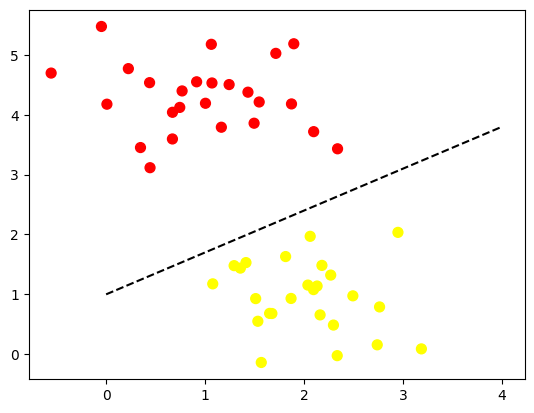

In [5]:
# Plotting the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# Plotting a line that crosses in the middle
line = np.linspace(0,4)
plt.plot(line, 0.7*line+1, 'k--')

In the plot above, we've generated 2 blobs of points, assigning them to 2 classes (class <span style="color:red">*red*</span> and class <span style="color:yellow">*yellow*</span>). We then **guessed** (nothing special here) a rough line that separates these 2 classes. What I wanted to show is the idea of classification. Instead of finding a pattern (which would be impossible for a linear model in this context), we instead find something that separates the 2 blobs as best as possible. We then define a simple rule: what's above the line (more generally, on one side of the model) is class <span style="color:red">*red*</span>, and what's below the line is class <span style="color:yellow">*yellow*</span>.  

We could then define this rule as:
<!-- Latex to write if y >= h(x) then class 1, class 2 otherwise -->

$$
\begin{align}
Class = \left\{
        \begin{array}{lr}
        \text{red }, & \text{if } y \geq h(x),
        \\
        \text{yellow }, & \text{otherwise}
        \end{array}
        \right.
\end{align}

$$


We now have 3 problems:
- what if our classes are *super-close* together?
- what if they are not separable by a simple line?
- when predicting new values, how do we choose the value that defines our decision boundary?

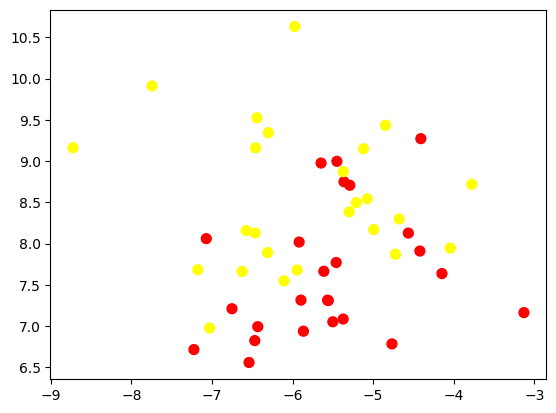

In [6]:
# 2 blobs of non-linearly-separable points
X, y = make_blobs(n_samples=50, centers=2, random_state=5, cluster_std=1)
# we plot them
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

This is one nightmare scenario. Our points are not separable by any stretch of the imagination. At least not in 2D.  
We definitely cannot use a line to fit our model. Even a high-degree polynomial model wouldn't be able to do this.  
There are certain situations in which we either search for a more advanced solution (let's say...take this problem to higher dimensions, gather more data / features about our observations), **or** we settle for models which do allow for impurities. This means we would allow for *some* of the <span style="color:red">red</span> points to be classified as <span style="color:yellow">yellow</span> points.

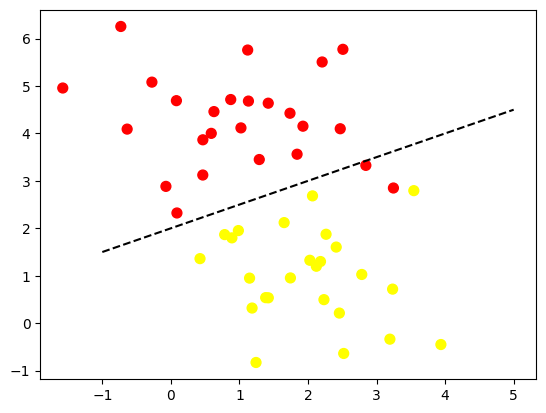

In [7]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=1)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
line = np.linspace(-1,5)
plt.plot(line, 0.5*line+2, 'k--')

In this example (again, a *guessed* line), we allow for some of the points to be *classified* wrongly. We realize it's harder to write something that perfectly separates the 2 classes, so we settle for this low effort solution that brings us most of the results.

# Binary classification

As you might remember from before, we had features(observations) as input. We had model parameters that we wanted to find and then use to predict new observations. Now we are doing (mostly) the same kind of work, but instead of just predicting a value, we would test what's that value's relation to our "trained" model. In simple problems, a line would do fine. Other times, we have to transform our output somehow.  

The most common way to do this is to apply some kind of function that maps our predicted value to a smaller space (typically ${[0...1]}$, defining the value as a **probability**). One such function is the **sigmoid function**.  

Here is the sigmoid function:  
$$
\begin{align}
h(x) = \sigma(x) = {\frac{1}{1+ e^{-x}}}
\end{align}
$$
Why do we use this function? Well, it's a function that maps any value to a value between 0 and 1. This is useful because we can then interpret the output as a probability. In classification, we want to know the probability of a point belonging to a certain class. This is why we're looking for a function that maps our output to a probability, and the sigmoid function does just that.  
As you can see, this popular function is denoted by the $\sigma$ symbol. Here is what it looks like:


In [8]:
from math import e
def sigmoid(x):
    return 1/(1+np.exp(-x))

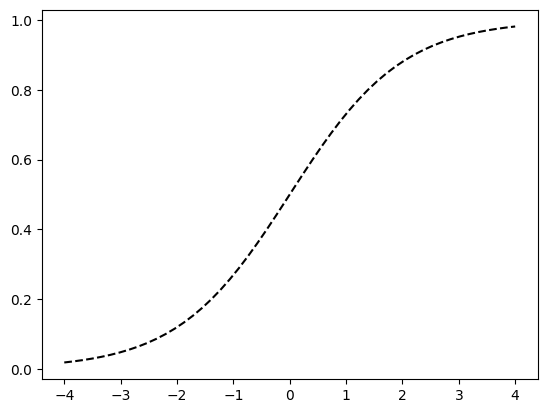

In [9]:
line = np.linspace(-4,4)
plt.plot(line, sigmoid(line),'k--')

And now, let's put this function to use, using the same dataset as before. We'll use the sigmoid function to map our predicted value to a smaller space. We'll then use a threshold to decide what class our point belongs to.  

## !!!

One important thing to mention: before, we had a 1-dimensional input space. In this dataset, I picked 2 input dimensions for visualization purposes. In real-world problems, we could also see a lot more dimensions. Any kind of new feature introduces a new dimension as well.  
For the sake of simplicity, we could first consider only 1 feature (the y-axis, since points are clearly separated this way). We can then consider both dimensions and see what happens.

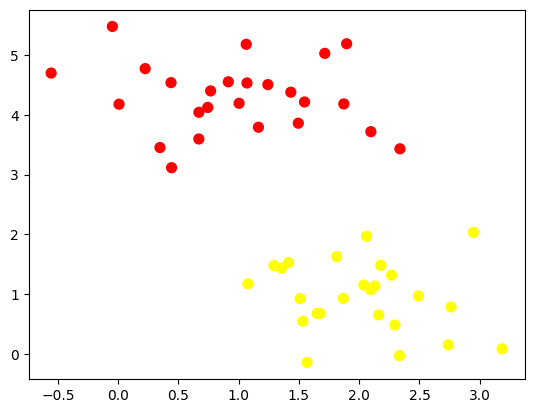

In [10]:
# Generate 2 blobs that are separated
X,y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60, center_box=(-10,10))
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')

Imagine we rotate this plot 90 degrees clockwise, and then we project the points onto the new x-axis. We would get something like this:

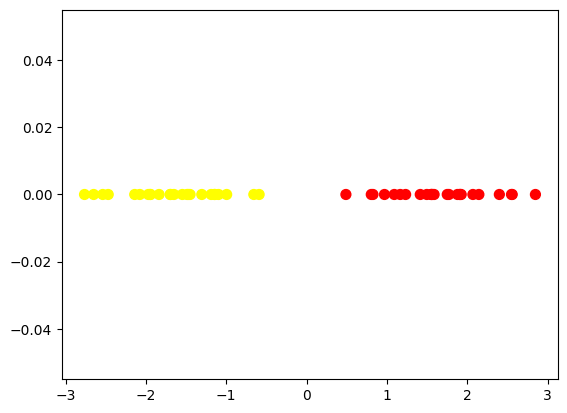

In [11]:
Xtransf = np.array([X[:,1] -  np.mean(X[:,1]), np.zeros_like(X[:,1])]).T
plt.scatter(Xtransf[:,0], Xtransf[:,1], c=y, s=50, cmap='autumn')

Applying the sigmoid function to this data would give us something like this:

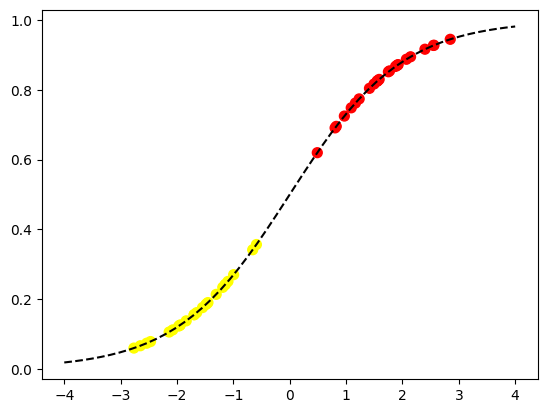

In [171]:
# Apply sigmoid to our data
Xtransf = np.array([X[:,1] -  np.mean(X[:,1]), np.zeros_like(X[:,1])]).T
# plt.scatter(Xtransf[:,0], Xtransf[:,1], c=y, s=50, cmap='autumn')
plt.scatter(Xtransf[:,0], sigmoid(Xtransf[:,0]), c=y, s=50, cmap='autumn')
plt.plot(line, sigmoid(line),'k--')

What we see above is that we performed some transformations to map our values to a 1-dimensional space. Then we applied the sigmoid function to map our values to the range ${[0...1]}$. We can now use a threshold as before (>= 0.5) to decide what class our point belongs to.  
Of course, odds are that we don't want to let this fixed 0.5 value dictate all of our results. Ideally, we would have the model tell us what threshold to use. We would train a model and let it decide when points belong to a certain class or not.


---------------
# Dimensionality

Remember, we intentionally left out 1 dimension in order to perform this easier version of the problem. Going forward, we will move back to 2 dimensions.

---------------

We should now address the fact that we cheated. During the array transformation, we used the fact that our blobs were clearly separable based on the y-axis. Their heights were different. In real scenarios, it might not be the height itself, maybe the x-axis is the one that separates the 2 classes.   

Let's now move forward and talk about training a logistic regressor.

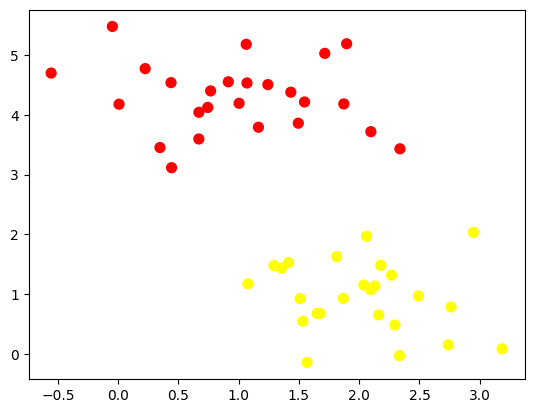

In [13]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')


# <span style="color:yellow">Cost function</span>

The regression problem used the $MSE$ cost function. In classification, we **generally** use the $J$ cost function. We call it the *cross-entropy* cost function.

$$
\begin{align}
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1-y^{(i)}) \log(1-h_\theta(x^{(i)})) \right]
\end{align}
$$

We observe a few things:
- we average it over all the training examples; again, this choice is specific to the batch-stochastic gradient descent decision we've discussed previously (we're going to do the batch variant here, with a slightly higher learning rate $\eta$ - compared to what we would choose if we were doing the stochastic variant).
- we have a new term: $h_\theta(x^{(i)})$. This is the sigmoid function applied to our predicted value. We use this to map our predicted value to the range ${[0...1]}$.
- we use logarithms. This is an important step. When our assumption is wrong, we want to penalize our cost function. If our predictions are confident, but wrong, we want to strongly raise the cost function. A log function allows us to do this, as values approaching 0 go to $-\infty$ (we can simply apply a $-$ after that, which we do, as you can see before the averaging term).
- we use our *ground truth* (real classes) to eliminate the class that's not relevant in that training instance:
$$0 * anything = 0$$



In [14]:
# Using batch gradient descent
# Necessary functions for the gradient descent method
def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))
def cross_entropy(y, yhat):
    return -np.mean(y*np.log(yhat) + (1-y)*np.log(1-yhat))
def cross_entropy_derivative(y, yhat):
    return yhat - y
def gradient_descent(X, y, iterations = 1000, eta = 1e-3):
    theta = np.random.randn(3)
    Xones = np.ones_like(X[:,0]).reshape(X.shape[0],1)
    Xtmp = np.hstack([X,Xones])
    m = len(y)
    costs = []
    for i in range(iterations):
        yhat = sigmoid(Xtmp.dot(theta))
        cost = cross_entropy(y, yhat)
        costs.append(cost)
        theta = theta - eta*(1/m)*Xtmp.T.dot(cross_entropy_derivative(y, yhat))
    return theta, costs

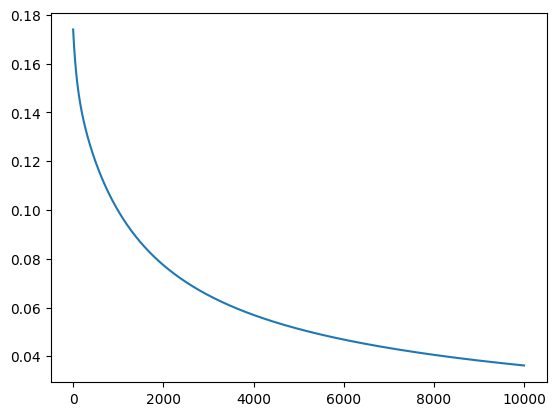

In [136]:
# print(np.stack(X, np.ones_like(X[:,0]).T, axis=1))
# X.append(np.ones_like(X[:,0]))
# append a column of ones to X

theta , costs = gradient_descent(X,y,10000,0.005)
    
plt.plot(costs)



# <span style="color:yellow">Attention</span>

See here that we plot our costs and they decrease over time? Fiddle a bit with the learning rate and see how this influences results.  
### !!!  

We often plot our cost over time to see how our model is learning. We can also plot our predictions over time to see how our model is learning. If our costs don't decrease over time, we either have bugs in the code, or must fine-tune our parameters (learning rate *especially*).

In [80]:
import plotly
from plotly import express as px
import plotly.graph_objects as go

We will need another library to visualize this one, since it's 3D. We'll use the `plotly` library. It's way easier. I personally prefer plotly lately. We will also plot the decision boundary (the function we've learned that helps us separate between the 2 classes).


In [1]:
# Theta is supposedly learned, so now we can plot the decision boundary
Xtransf = np.hstack([X, np.ones_like(X[:, 0]).reshape(X.shape[0], 1)])
yhat = sigmoid(Xtransf.dot(theta))

decisionBoundary = plotly.graph_objects.Surface(x=X[:,0], y=X[:,1], z=Xtransf.dot(theta))
xFrom = np.min(X[:,0])
xTo = np.max(X[:,0])
yFrom = np.min(X[:,1])
yTo = np.max(X[:,1])

points = go.Scatter3d(x=X[:,0], y=X[:,1], z=yhat, mode='markers', marker=dict(size=8, color = y, colorscale='thermal',opacity=1.0))
decisionBoundary = go.Mesh3d(x=X[:,0], y=X[:,1], z=Xtransf.dot(theta), color='lightpink', showscale=False, opacity=0.9)
fig = go.Figure(data=[points,decisionBoundary])
fig.update_layout(
     scene = dict(
        xaxis = dict(nticks=4, range=[xFrom,xTo]),
        yaxis = dict(nticks=4, range=[yFrom,yTo]),
        zaxis = dict(nticks=4, range=[np.min(yhat)-0.1, np.max(yhat)+0.1])))

fig.show()


NameError: name 'np' is not defined

We can separate these 2 classes with our trained model (a plane). By applying the sigmoid function, we get the probability that our data point belongs to a certain class (let's say yellow, for this example). We don't necessarily have to use 0.5 as the threshold, but generally models will learn to use this point as a separator for the 2 classes.  

Remember, a z-value of 1 means high probability (certainty) that the point belongs to class A; a low value (close to 0) means *not belonging to* class A, meaning class B.

# One vs All / One vs Rest

You might be wondering yourself now: "what if we have more than 2 classes?". Well, we can use the same approach as before. We can train a model for each class, and then use the sigmoid function to map our predicted value to a probability. We can then use the highest probability to decide what class our point belongs to. We call this approach the **One vs All** approach.  

The name comes from the fact that we train a binary classifier that only tells us whether a point belongs to a certain class or not (meaning it's *my* class, or *not my* class; so **one vs the rest**). By using all these models together, we can decide which specific class our point belongs to.  

The problem of deciding among multiple classes is called **multi-class classification**. We often find it in the real world. For example, let's say we own a store that sells t-shirts. Deciding whether a certain customer wears XS, S, M, L, XL, or XXL is a multi-class classification problem. We can use the One vs All approach to solve the problem.  

# Note

This approach is just a conceptual solution, it is not necessarily tied to classification via a logistic regressor. We have many other models we could be using. Some of them will be discussed going forward, so I will name them here.  

- **Support Vector Machines** (SVMs) are a very popular model for classification. They are very powerful, and can be used for both linear and non-linear classification. They are also very fast to train.
- **Decision Trees** are a very popular model for classification. They are very fast to train, and can be used for both linear and non-linear classification. They are also very easy to interpret.
- **Random Forests** are a very popular model for classification. They are very fast to train, and can be used for both linear and non-linear classification. They are also very easy to interpret. They are an ensemble of decision trees.
- **Neural Networks** are a very popular model for classification. They are very fast to train, and can be used for both linear and non-linear classification. They are also very easy to interpret. They are an ensemble of decision trees.  
One other used algorithm is kNN (k-Nearest Neighbors). It's simple, powerful, easy to interpret and fast to train. It **is** popular and used in many scenarios.

The common link between all of these is that we are now talking about **supervised algorithms**. Remember, in supervised scenarios we have labeled data that we can use to observe patterns. In unsupervised scenarios, we can only tell if data adheres to previously-found patterns or not.  The most popular unsupervised algorithm (by far) is **k-Means**. We will talk about it in a separate section.  

Next up: [kNearestNeighbors](kNearestNeighbors.ipynb)